## EXPLORATORY DATA ANALYSIS - AIRBNB DATA

**STEP 1: LOAD DATA SET**

In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**STEP 2: INICIAL ANALYSIS, DEFINING VARIABLES AND DATA CLEANING**

In [6]:
# DIMENSION OF DATA FRAME
print("Dimension of data frame: ", df.shape)

Dimension of data frame:  (48895, 16)


In [7]:
# INFORMATION OF DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# CHECKING DATA STATUS
df.sample(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7948,6103273,Chic 2bed-2bath Manhattan Dream,4562182,Florence,Manhattan,Harlem,40.81128,-73.94647,Entire home/apt,285,30,104,2019-06-30,2.07,4,249
18382,14444988,"Charming, fun, private East Village apartment",16419280,John,Manhattan,East Village,40.72541,-73.97638,Entire home/apt,215,1,76,2019-06-23,2.16,1,245


In [9]:
# NON NUMERCIAL COLUMNS
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [10]:
# OBSERVING ALL THE COLUMNS TO DEFINING VARIABLES
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In conclusion we have 48895 rows in 16 columns, it can be seen that the highest percentage of NaN data is to be found in the `last_review` and `number_of_reviews`

By defining the variables for subsequent analysis we would obtain:

-Categorical: `name`, `host_name`, `neighbourhood_group`, `neighbourhood`, `room_type`, `last_review`, `id`, `host_id`.

-Numerical:`latitude`, `longitude`, `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`,`calculated_host_listing_count`,`availability_365`.

In [11]:
# FINDING THE DUPLICATE DATA

print(f"Name :{df['name'].duplicated().sum()}")
print(f"Host_name: {df['host_name'].duplicated().sum()}")
print(f"Host_id: {df['host_id'].duplicated().sum()}")
print(f"ID: {df['id'].duplicated().sum()}")

Name :989
Host_name: 37442
Host_id: 11438
ID: 0


In [12]:
# DELETING THE IRRELEVANT INFORMATION

df.drop(['name','host_name','reviews_per_month', 'latitude', 'longitude','id'], axis = 1, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,1,0


**STEP 3: ANALYSIS OF VARIABLES**

*CATEGORICAL:*

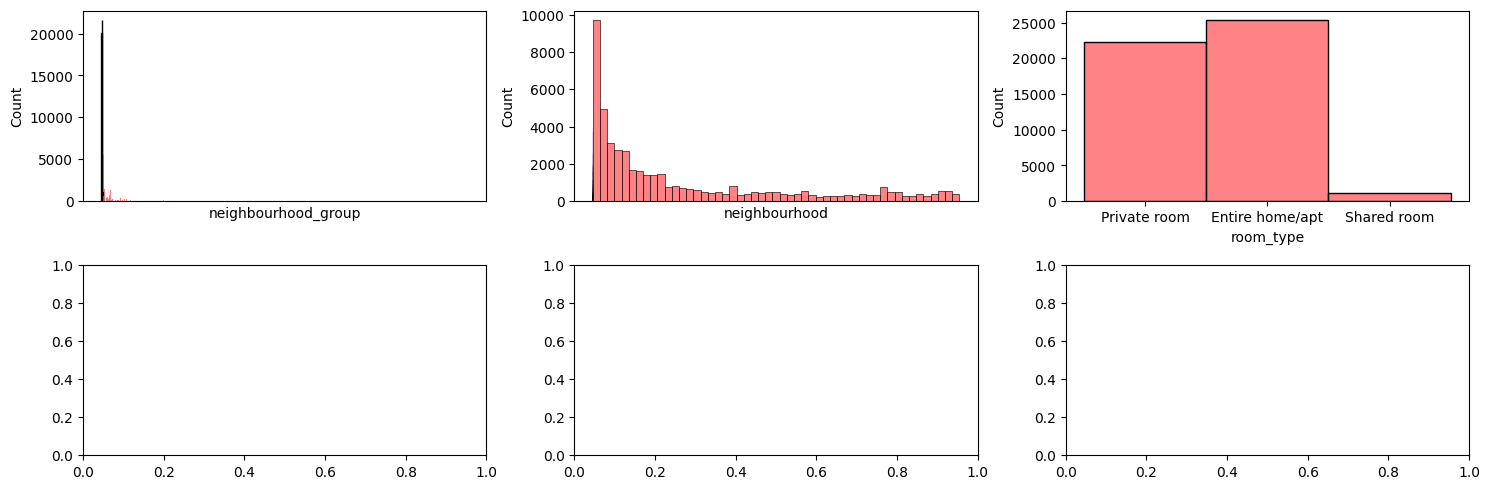

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure
fig, axis = plt.subplots(2, 3, figsize=(15,5))

# Builing the plots
sns.histplot(ax = axis[0,0], data = df, x="neighbourhood_group", color="#FF585D")
sns.histplot(ax = axis[0,1], data = df, x="neighbourhood", color="#FF585D").set_xticks([])
sns.histplot(ax = axis[0,2], data = df, x="room_type", color="#FF585D")
sns.histplot(ax = axis[0,0], data = df, x="last_review", color="#FF585D").set_xticks([])
sns.histplot(ax = axis[0,1], data = df, x="host_id", color="#FF585D")

# Adjunts the layout
plt.tight_layout()

# Display the plot
plt.show()

*_NUMERICAL_*:

In [ ]:
# Create the figure



In [ ]:
#DETECTING THE NaN
nan_counts = df.isna().sum()
print(nan_counts)